In [28]:
from Beam_trace import *
def defaultplot(ls,zoom):
    print(ls.surfaces[3].R)
    plt.figure(figsize=(15,10))
    ls.plot()
    ls.calculate_marginal()
    CLC=ls.circle_of_least_confusion()
    print(CLC)
    offset=0.09*0
    bb=beam_field()        
    bb.rectangular_grid(1,250,ls.entrance_pupil,0.002*0)
    bb.propagate(ls.surfaces)
    bb.plot(color='black')
    ls.calculate_marginal()
    ls.marginal_ray.plot(color='red',lw=1)
    if zoom >0:
        plt.xlim(CLC[0]-5*zoom,CLC[0]+5*zoom)
        plt.ylim(-1*zoom+offset,1*zoom+offset)
    #plt.xlim(112.9,113.1)
    #plt.ylim(10,25)
    plt.show()
    print(ls.entrance_pupil)
if True:
    s=lens_system(24)
    s.surfaces=[]

    s.add_surface(surface(3.5,0.,1.514))
    s.add_surface(surface(40,0,1))
    #convex f=300
    #s.add_surface(surface(11.8,1/150.,1.514))
    #s.add_surface(surface(40,-1/150.,1))
    #add_achromat(s,100,300)
    add_achromat(s,250,300)
    #add_achromat(s,150,300)
    s.add_surface(surface(40,0,1))
   
print(s.surfaces[-2].pos())

53.0


<bound method surface.R of <Beam_trace.surface object at 0x7f3abff21da0>>
(297.73892501500501, 0.0018135228429656536)


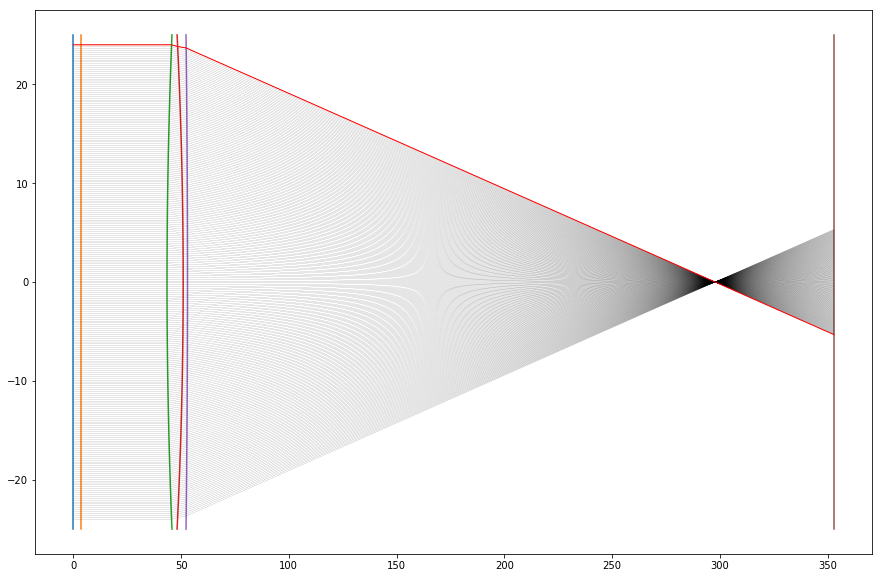

24


In [29]:
defaultplot(s,0)

In [1]:
def add_achromat(s,f,DISZ):
    """Add Thorlabs achromat f=focal length (needs to be one of the available)
        s=lens system, DISZ = distance after lens
    """
    if f==250:
        
        #f=250 achromat
        s.add_surface(surface(7.5, 7.294478080093399900E-003   ,1.5139))
        s.add_surface(surface(2, -8.953353030709999500E-003   ,1.6411))
        s.add_surface(surface(DISZ, -2.177700348432099900E-003  ,1))
    elif f==200:
       #f=200 achromat
        s.add_surface(surface(8.5,  9.102494083378799600E-003    ,1.5139))
        s.add_surface(surface(2,  -1.073998496402110000E-002  ,1.6411))
        s.add_surface(surface(DISZ,  -2.657807308970099800E-003  ,1))
    elif f==150:    
        #f=150 achromat
        s.add_surface(surface(12,1.202212070209180000E-2 ,1.514))
        s.add_surface(surface(3,-1.386577925679420000E-002 ,1.6656))
        s.add_surface(surface(DISZ,-4.037141703673800000E-003 ,1))
    elif f==100:    
        #f=100 achromat
        s.add_surface(surface(16, 1.406074240719910000E-002  ,1.665))
        s.add_surface(surface(4,-2.263980076975320000E-002  ,1.7196))
        s.add_surface(surface(DISZ, -2.754062241806699900E-003  ,1))
